In [17]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as sciopt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.signal import find_peaks

In [18]:
#Unpacking data files
data = np.loadtxt('Group_B_BB.dat') # Blackbody
neon = np.loadtxt('Ne_calib.dat') # Neon spectrum

Text(0.5, 1.0, 'Neon Lamp: Pixel VS Intensity')

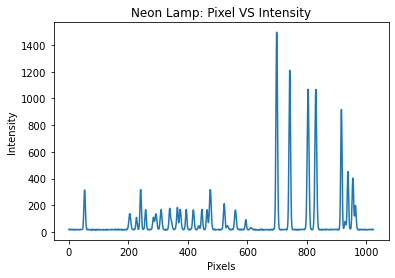

In [19]:
#Plotting neon spectrum
plt.plot(neon)
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('Neon Lamp: Pixel VS Intensity')

The intensities of the neon lines = [ 314.17537   136.47269   108.64154   316.78071   166.11297   109.75064
  135.10089   166.98908    22.586071  176.97876   183.17059   168.79961
  168.01941   165.17445    45.920963  168.63384   165.70664   316.72719
  210.99634    47.254668  163.54964    91.096053   31.138695   31.12473
 1495.2875   1210.3815   1067.8626   1066.9936    916.43762    78.142911
  451.26308   402.17602   197.99096 ]
Centroid (pixel positions) = [ 53 205 227 241 258 284 292 310 318 339 364 374 394 418 437 447 464 475
 522 533 560 595 611 613 698 742 804 830 916 928 938 954 963]
33


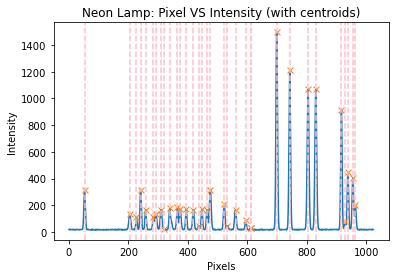

In [20]:
ne_dataset = pd.DataFrame({'Intensity': neon})
ne_dataset.index = np.arange(1, len(ne_dataset)+1)
x = np.array(ne_dataset.index)

#Using find_peaks function to find the centroids 
peaks, _ = find_peaks(neon, height = 22)
plt.plot(neon)
plt.plot(peaks, neon[peaks], "x")
[plt.axvline(lines, ls = '--', color = 'pink') for lines in peaks]

plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('Neon Lamp: Pixel VS Intensity (with centroids)')
print('The intensities of the neon lines =', neon[peaks])
print('Centroid (pixel positions) =', peaks)

#Checking length of data
print(len(peaks))

0.23570363904035574
526.5056923314132


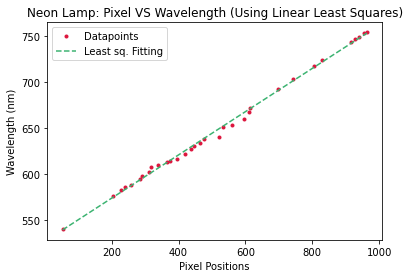

In [26]:
# Using the least squares method: we can find this manually

#Plotting datapoints
plt.plot(peaks, y1, '.', color = 'crimson',label = 'Datapoints')
plt.xlabel('Pixel Positions')
plt.ylabel('Wavelength (nm)')
plt.title('Neon Lamp: Pixel VS Wavelength (Using Linear Least Squares)')
n = len(y1)

# Matrices
ma = np.array([[np.sum(x1**2), np.sum(x1)], [np.sum(x1), n]])
mc = np.array([[np.sum(x1*y1)], [np.sum(y1)]])

#Gradient and Intercept
mainv = np.linalg.inv(ma)

equation = np.dot(mainv, mc) #multiplying matrices

#Plotting best fit over the datapoints
m_fit = equation[0,0]
c_fit = equation[1,0]
print(m_fit)
print(c_fit)

plt.plot(x1, m_fit*x1 + c_fit, '--', color = 'mediumseagreen', label='Least sq. Fitting')
plt.legend()

33
33
[2.35703639e-01 5.26505692e+02]
[[ 4.92882806e-07 -2.55507460e-04]
 [-2.55507460e-04  1.62756549e-01]]
[0.00070206 0.40343097]


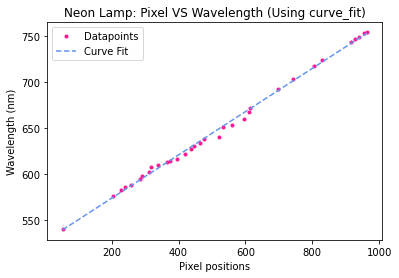

In [27]:
# Alternatively, Using Curve Fit to perform data fitting
x1 = peaks #centroids
y1 = np.array([540.056, 576.441, 582.015, 585.249, 588.189, 594.483, 597.553, 602, 607.433, 609.616, 612.884, 614.306, 616.359, 621.728, 626.649, 630.479, 633.442, 638.299, 640.225, 650.653, 653.288, 659.895, 667.828, 671.704, 692.947, 703.241, 717.394, 724.512, 743.890, 747.244, 748.887, 753.577, 754.404])
# extracted wavelengths

print(len(x1))
print(len(y1))

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='deeppink')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (nm)')
plt.title('Neon Lamp: Pixel VS Wavelength (Using curve_fit)')

# Curve fitting
# Equations:
def linear(slope, x_val, y_int):
    return (slope*x_val)+y_int

# Curve Fitting 
popt, pcov = curve_fit(linear, x1, y1, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

print(popt)
print(pcov)
print(pstd)
plt.plot(x1, linear(x1, popt[0], popt[1]), '--', color='cornflowerblue', label='Curve Fit')
plt.legend()

In [23]:
# Error propagation

N = len(x1)
err = np.sqrt((1/(N-2))*(np.sum((y1-(popt[0]*x1+popt[1]))**2)))
print('Deviation from fit:',err)


Deviation from fit: 3.140592700007109


Text(0.5, 1.0, 'Blackbody: Pixel VS Intensity')

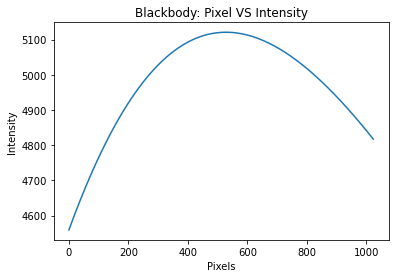

In [24]:
plt.plot(data)
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('Blackbody: Pixel VS Intensity')

[528] {'peak_heights': array([5121.])}
Temperature of the given blackbody = 4451.555177227371 K


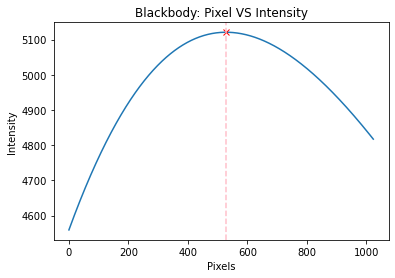

In [25]:
# Blackbody Analysis
bb_peak, bb_h = find_peaks(data, height = 200)
plt.plot(data)
plt.plot(bb_peak, data[bb_peak], "x", color = 'red')
plt.axvline(x = bb_peak, ls = '--', color = 'pink')
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('Blackbody: Pixel VS Intensity')
print(bb_peak, bb_h)

# Equations:
def linear(slope, x_val, y_int):
    return (slope*x_val)+y_int

wl = linear(popt[0], bb_peak, popt[1])

# Wien's Law: wavelength peak = b / T
# where b = constant of proportionality, and T = absolute temperature

# First converting the obtained wavelength from nm into m:
m_wl = wl/1e+09

# Then using b = 2.897771955e-03 as the constant of proportionality
b = 2.897771955e-03 # in m*K

# Rearrange equation into T = b / wavelength
temp = b/m_wl

print('Temperature of the given blackbody =', temp[0], 'K')

In [ ]:
#Look at data file with our obtained maximas to determine centroids: 

# 1495.2875 = 699
# 1210.3815 = 743
# 1067.8626 = 805
# 1066.9936 = 831
# 916.43762 = 917